In [1]:
import pandas as pd

In [8]:
df = pd.read_csv("Student_performance_10k.csv")
df.head()


,roll_no,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,science_score,total_score,grade
0,std-01,male,group D,some college,1.0,1.0,89,38.0,85.0,26.0,238.0,C
1,std-02,male,group B,high school,1.0,0.0,65,100.0,67.0,96.0,328.0,A
2,std-03,male,group C,master's degree,1.0,0.0,10,99.0,97.0,58.0,264.0,B
3,std-04,male,group D,some college,1.0,1.0,22,51.0,41.0,84.0,198.0,D
4,std-05,male,group C,some college,0.0,1.0,26,58.0,64.0,65.0,213.0,C


In [3]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   roll_no                      9999 non-null   object 
 1   gender                       9982 non-null   object 
 2   race_ethnicity               9977 non-null   object 
 3   parental_level_of_education  9978 non-null   object 
 4   lunch                        9976 non-null   float64
 5   test_preparation_course      9977 non-null   float64
 6   math_score                   9976 non-null   object 
 7   reading_score                9975 non-null   float64
 8   writing_score                9976 non-null   float64
 9   science_score                9977 non-null   float64
 10  total_score                  9981 non-null   float64
 11  grade                        9997 non-null   object 
dtypes: float64(6), object(6)
memory usage: 937.6+ KB


In [4]:
df.isnull()

,roll_no,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,science_score,total_score,grade
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,False,False,False,False,False,False,False,False,False,False,False,False
9996,False,False,False,False,False,False,False,False,False,False,False,False
9997,False,False,False,False,False,False,False,False,False,False,False,False
9998,False,False,False,False,False,False,False,False,False,False,False,False


In [5]:
df.isnull().sum()

roll_no                         1
gender                         18
race_ethnicity                 23
parental_level_of_education    22
lunch                          24
test_preparation_course        23
math_score                     24
reading_score                  25
writing_score                  24
science_score                  23
total_score                    19
grade                           3
dtype: int64

In [6]:
df.isnull().sum().sum()

229

In [7]:
df.columns

Index(['roll_no', 'gender', 'race_ethnicity', 'parental_level_of_education',
       'lunch', 'test_preparation_course', 'math_score', 'reading_score',
       'writing_score', 'science_score', 'total_score', 'grade'],
      dtype='object')

In [14]:
df['math_score'] = pd.to_numeric(df['math_score'],  errors='coerce')

In [19]:
# Filling missing numeric values with the column mean
df['math_score'] = df['math_score'].fillna(df['math_score'].mean())
df['reading_score'] = df['reading_score'].fillna(df['reading_score'].mean())
df['writing_score'] = df['writing_score'].fillna(df['writing_score'].mean())
df['science_score'] = df['science_score'].fillna(df['science_score'].mean())
df['total_score'] = df['total_score'].fillna(df['total_score'].mean())


In [17]:
# Filling missing categorical values with the mode (most frequent value)
df['gender'] = df['gender'].fillna(df['gender'].mode()[0])
df['race_ethnicity'] = df['race_ethnicity'].fillna(df['race_ethnicity'].mode()[0])
df['parental_level_of_education'] = df['parental_level_of_education'].fillna(df['parental_level_of_education'].mode()[0])
df['lunch'] = df['lunch'].fillna(df['lunch'].mode()[0])
df['test_preparation_course'] = df['test_preparation_course'].fillna(df['test_preparation_course'].mode()[0])

In [21]:
df['roll_no'] = df['roll_no'].fillna('0')

In [25]:
df = pd.get_dummies(df, columns=['grade'], drop_first=True)  # One-hot encoding

In [30]:
# 4. Check for inconsistencies in categorical columns (e.g., unexpected values)
print("\nUnique values in categorical columns:")
print(f"Gender: {df['gender'].unique()}")
print(f"Race/Ethnicity: {df['race_ethnicity'].unique()}")
print(f"Parental Level of Education: {df['parental_level_of_education'].unique()}")
print(f"Lunch: {df['lunch'].unique()}")
print(f"Test Preparation Course: {df['test_preparation_course'].unique()}")


Unique values in categorical columns:
Gender: ['male' 'female' 'Boy' '\\tmale' 'Girl']
Race/Ethnicity: ['group D' 'group B' 'group C' 'group E' 'group A' 'A' 'C' 'D'
 'group C\\n' 'B' 'E']
Parental Level of Education: ['some college' 'high school' "master's degree" "associate's degree"
 'some high school' "bachelor's degree"]
Lunch: [1. 0.]
Test Preparation Course: [1. 0.]


In [31]:
# Clean gender
df['gender'] = df['gender'].astype(str).str.strip().str.lower().replace({
    'boy': 'male',
    '\\tmale': 'male',
    'girl': 'female'
})

# Clean race/ethnicity
df['race_ethnicity'] = df['race_ethnicity'].astype(str).str.strip().str.replace(r'\n', '', regex=True).replace({
    'A': 'group A',
    'B': 'group B',
    'C': 'group C',
    'D': 'group D',
    'E': 'group E'
})


In [37]:
q1=df.math_score.quantile(0.25) 
q3=df.math_score.quantile(0.75) 
q1,q3

(41.0, 73.0)

In [38]:
IQR=q3-q1
IQR

32.0

In [39]:
lower_limit=q1-1.5*IQR 
upper_limit=q3+1.5*IQR 
lower_limit, upper_limit

(-7.0, 121.0)

In [40]:
df[(df.math_score<lower_limit) | (df.math_score>upper_limit)]

,roll_no,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,science_score,total_score,grade_B,grade_C,grade_D,grade_Fail


In [41]:
df = df[(df.math_score>lower_limit)&(df.math_score<upper_limit)]

,roll_no,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,science_score,total_score,grade_B,grade_C,grade_D,grade_Fail
0,std-01,male,group D,some college,1.0,1.0,89.0,38.0,85.0,26.0,238.0,0,1,0,0
1,std-02,male,group B,high school,1.0,0.0,65.0,100.0,67.0,96.0,328.0,0,0,0,0
2,std-03,male,group C,master's degree,1.0,0.0,10.0,99.0,97.0,58.0,264.0,1,0,0,0
3,std-04,male,group D,some college,1.0,1.0,22.0,51.0,41.0,84.0,198.0,0,0,1,0
4,std-05,male,group C,some college,0.0,1.0,26.0,58.0,64.0,65.0,213.0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,std-9996,female,group C,some college,1.0,0.0,78.0,60.0,46.0,58.0,242.0,0,1,0,0
9996,std-9997,female,group C,bachelor's degree,1.0,0.0,37.0,92.0,99.0,73.0,301.0,1,0,0,0
9997,std-9998,female,group B,associate's degree,1.0,1.0,70.0,71.0,100.0,90.0,331.0,0,0,0,0
9998,std-9999,female,group B,some high school,1.0,0.0,87.0,60.0,100.0,89.0,336.0,0,0,0,0


In [42]:
df.describe()

,lunch,test_preparation_course,math_score,reading_score,writing_score,science_score,total_score,grade_B,grade_C,grade_D,grade_Fail
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.0000
mean,0.645100,0.387800,57.178747,70.125915,71.415798,66.063045,264.740908,0.565900,0.270100,0.067100,0.0062
std,0.478507,0.487273,21.720060,19.002444,18.223450,19.302093,42.264645,0.495663,0.444033,0.250208,0.0785
min,0.000000,0.000000,0.000000,17.000000,10.000000,9.000000,89.000000,0.000000,0.000000,0.000000,0.0000
25%,0.000000,0.000000,41.000000,57.000000,59.000000,53.000000,237.000000,0.000000,0.000000,0.000000,0.0000
50%,1.000000,0.000000,58.000000,71.000000,72.000000,67.000000,268.000000,1.000000,0.000000,0.000000,0.0000
75%,1.000000,1.000000,73.000000,85.000000,85.000000,81.000000,294.000000,1.000000,1.000000,0.000000,0.0000
max,1.000000,1.000000,100.000000,100.000000,100.000000,100.000000,383.000000,1.000000,1.000000,1.000000,1.0000


In [44]:
df['zscore']=(df.math_score - df.math_score.mean())/df.math_score.std() 
df

,roll_no,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,science_score,total_score,grade_B,grade_C,grade_D,grade_Fail,zscore
0,std-01,male,group D,some college,1.0,1.0,89.0,38.0,85.0,26.0,238.0,0,1,0,0,1.465063
1,std-02,male,group B,high school,1.0,0.0,65.0,100.0,67.0,96.0,328.0,0,0,0,0,0.360094
2,std-03,male,group C,master's degree,1.0,0.0,10.0,99.0,97.0,58.0,264.0,1,0,0,0,-2.172128
3,std-04,male,group D,some college,1.0,1.0,22.0,51.0,41.0,84.0,198.0,0,0,1,0,-1.619643
4,std-05,male,group C,some college,0.0,1.0,26.0,58.0,64.0,65.0,213.0,0,1,0,0,-1.435482
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,std-9996,female,group C,some college,1.0,0.0,78.0,60.0,46.0,58.0,242.0,0,1,0,0,0.958619
9996,std-9997,female,group C,bachelor's degree,1.0,0.0,37.0,92.0,99.0,73.0,301.0,1,0,0,0,-0.929037
9997,std-9998,female,group B,associate's degree,1.0,1.0,70.0,71.0,100.0,90.0,331.0,0,0,0,0,0.590295
9998,std-9999,female,group B,some high school,1.0,0.0,87.0,60.0,100.0,89.0,336.0,0,0,0,0,1.372982


<Axes: xlabel='math_score'>

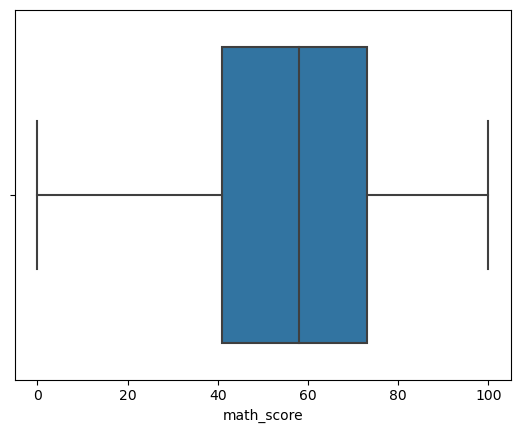

In [46]:
import seaborn as sns 
sns.boxplot(x=df['math_score'])